In [1]:
!pip install opencv-python

In [2]:
import cv2
from matplotlib import pyplot as plt
import skimage.measure
import numpy as np

v 값만 쓸꺼에용


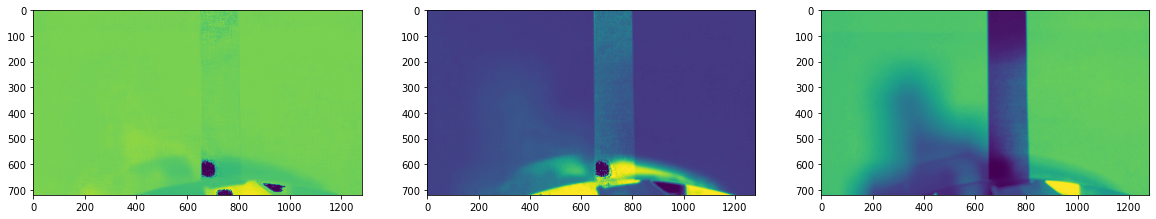

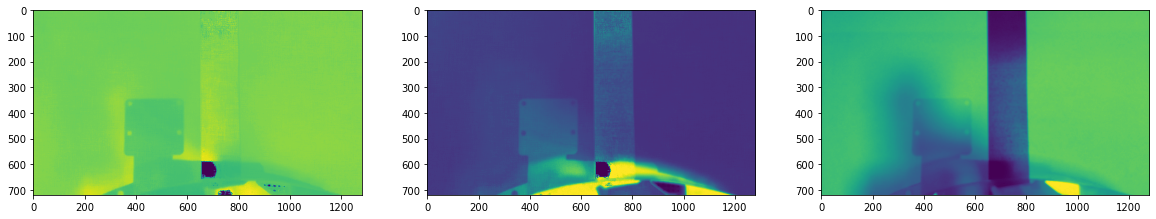

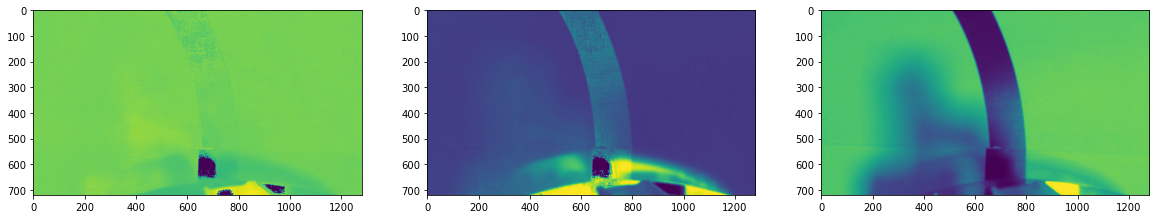

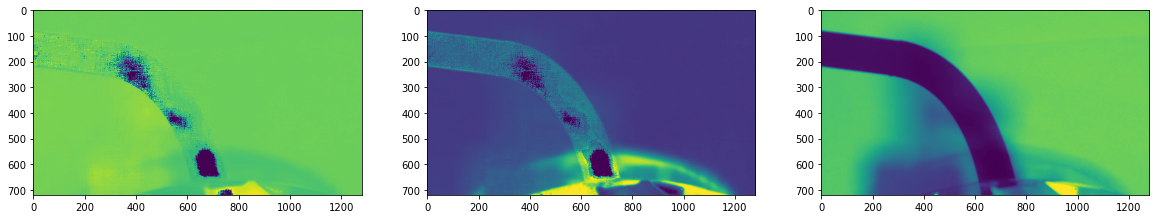

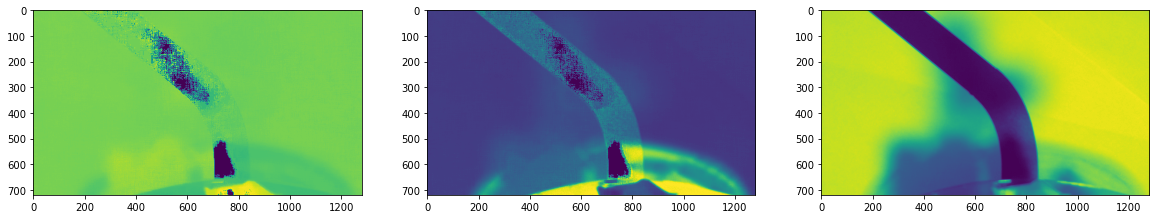

In [3]:
for i in range(1,6):
    # Load img
    img = cv2.imread("test" + str(i) + ".jpg")

    # BGR -> HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    fig=plt.figure(figsize=(20, 20))
    fig.add_subplot(1, 3, 1)
    plt.imshow(h)
    fig.add_subplot(1, 3, 2)
    plt.imshow(s)
    fig.add_subplot(1, 3, 3)
    plt.imshow(v)
print("v 값만 쓸꺼에용")

In [4]:
def rescale_frame(frame, percent=75):
    width = int(frame.shape[1] * percent/ 100)
    height = int(frame.shape[0] * percent/ 100)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)

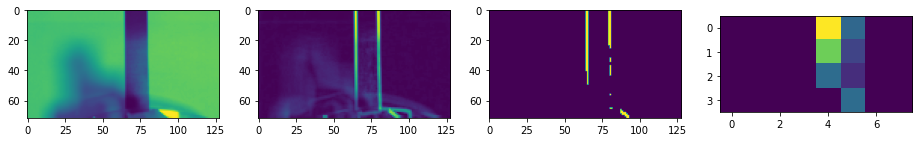

Left Front Right
0.0 1.0 0.0


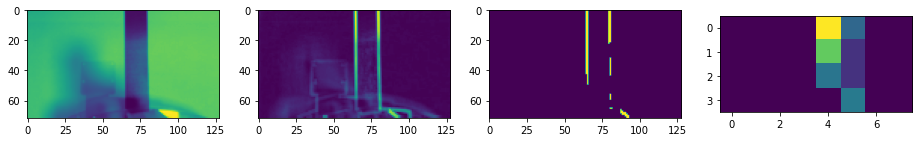

Left Front Right
0.0 1.0 0.0


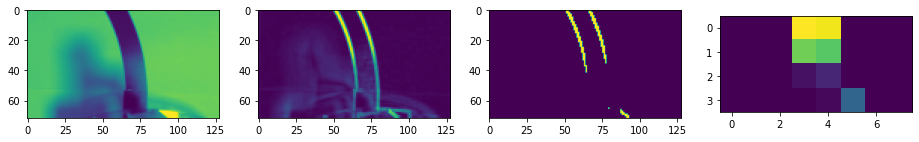

Left Front Right
0.8399999999999997 1.0 0.0


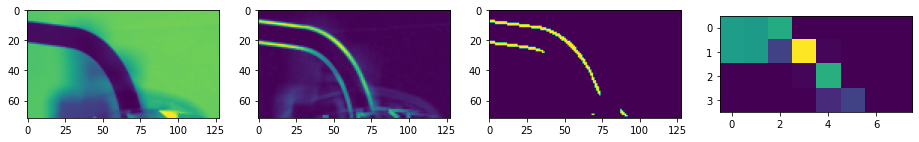

Left Front Right
1.0 0.2391304347826087 0.0


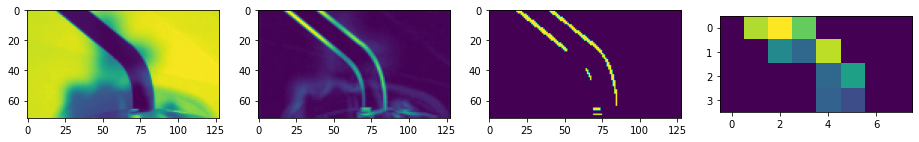

Left Front Right
1.0 0.6818181818181818 0.0


In [5]:
for i in range(1,6):
    fig=plt.figure(figsize=(20, 20))

    # Load img
    img = cv2.imread("test" + str(i) + ".jpg")
    # 해상도 낮춤 (72, 128, 3)
    img = rescale_frame(img, 10)

    # BGR -> HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    _, _, img = cv2.split(hsv)
    fig.add_subplot(1, 5, 1)
    plt.imshow(img)

    # MORPH_GRADIENT
    k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    img = cv2.morphologyEx(img,cv2.MORPH_GRADIENT, k)
    fig.add_subplot(1, 5, 2)
    plt.imshow(img)

    # Thresold
    _, img = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY)
    fig.add_subplot(1, 5, 3)
    plt.imshow(img)

    # Pooling
    w, h = int(img.shape[1] / 8) , int(img.shape[0] / 4)
    img = skimage.measure.block_reduce(img, (h,w), np.mean)
    fig.add_subplot(1, 5, 4)
    plt.imshow(img)

    plt.show()

    #go?
    left = 0
    front = 0
    right = 0
    back = 0
    for i in range(len(img)):
        for j in range(len(img[i])):
            if j <= 3:
                left += img[i][j]
            elif 4 <= j and j <= 5:
                front += img[i][j]
            elif 6<= j:
                right += img[i][j]
    d = max(left, front, right)
    left /= d
    front /= d
    right /= d
    print("Left", "Front", "Right")
    print(left, front, right)
    